In [19]:
# Declaración de librerías
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Generar un conjunto de datos artificial con 2 clases
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Revisión de entradas y salidas
print(X)

[[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-1.5598485  -1.92487377]
 [-2.2813861  -0.1368559 ]
 [ 1.56070438 -0.42795824]
 [-0.80804463  1.19664076]
 [-0.27062383 -2.25553963]
 [ 0.480502    0.54914434]
 [-1.20757158 -1.26898369]
 [ 0.25415746 -1.79532002]
 [ 2.59123946  0.24472415]
 [ 0.07123641  0.49429823]
 [-1.17762637 -1.20592943]
 [ 0.93343952  0.68811892]
 [ 1.65214494 -0.35885569]
 [-1.40735658 -1.56826626]
 [ 1.02255619 -1.08324727]
 [-0.81680628 -0.6795874 ]
 [ 1.50575249 -0.38919817]
 [-2.17105282 -0.04862909]
 [ 0.71479373 -1.42922002]
 [-0.15013844 -0.11708689]
 [-1.4117586  -1.5332749 ]
 [-2.58590856 -0.40925706]
 [ 0.82600732 -1.05383855]
 [-0.07133524  0.08896214]
 [ 0.6273745  -1.32933233]
 [ 1.65882246 -0.43131517]
 [ 1.2798899   1.25896077]
 [ 0.25058844  0.13979096]
 [-0.05319823  1.85605469]
 [-2.05832072 -2.52343407]
 [-2.02632079  0.06194498]
 [-1.65830375 -1.57127256]
 [ 1.28008347  1.28938375]
 [ 0.96423311  0.55600276]
 [-1.87653774  0.23085877]
 

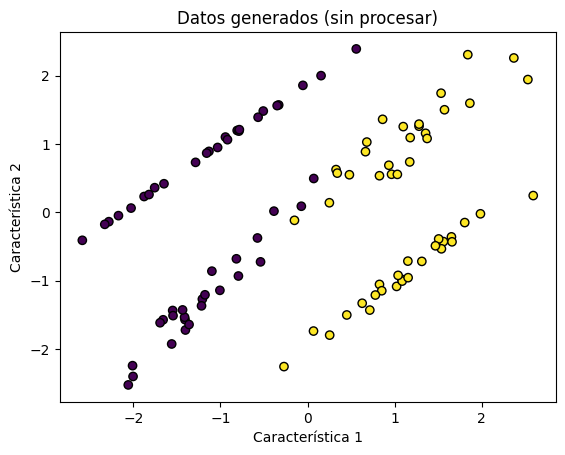

In [21]:
# Visualizar los datos generados antes de cualquier procesamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Datos generados (sin procesar)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [22]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Activación sigmoid para clasificación binaria
])

In [25]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6872 - accuracy: 0.6750 - val_loss: 0.6995 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.7000 - val_loss: 0.6761 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.7250 - val_loss: 0.6534 - val_accuracy: 0.7500
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.7250 - val_loss: 0.6315 - val_accuracy: 0.7500
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.7250 - val_loss: 0.6100 - val_accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7250 - val_loss: 0.5895 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7250 - val_loss: 0.5687 - val_accuracy: 0.7500
Epoch 8/20
5/5 [=================

In [27]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

1/1 [==============================] - 0s 16ms/step - loss: 0.3347 - accuracy: 1.0000
Pérdida: 0.3347, Precisión: 1.0000


15527/15527 [==============================] - 3s 163us/step


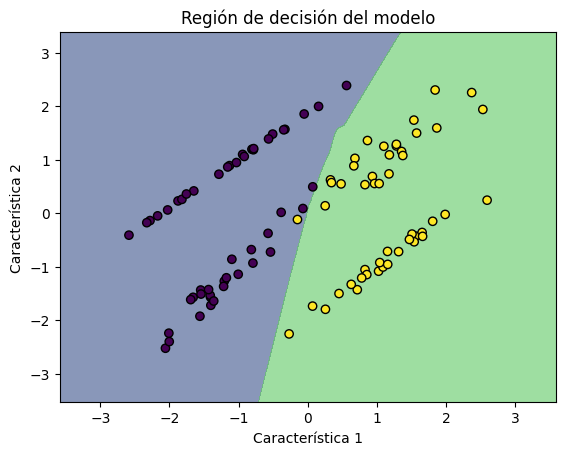

In [28]:
# Crear una malla para visualizar la región de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir con el modelo sobre la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar la región de decisión
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Región de decisión del modelo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()